In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [2]:
df1_2 = pd.read_excel('df1_2.xlsx', header=None)
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

array1 = np.array(df1_2)  # 将df转换为list对象
list1 = array1.tolist()  # 将array转换为list
list1 = list1[0]         # 获取第一行的数据
df1_2.columns = list1

In [3]:
df1_2 = df1_2.drop(df1_2.index[0])
df1_2.index = map(str, np.arange(df1_2.index.size))

In [4]:
df1_2 = df1_2.apply(lambda x:x.astype(float))
corr1 = df1_2.corr("spearman")

In [5]:
n1 = df1_2.columns[corr1['RON损失'].abs()> 0.25].drop('RON损失')

In [123]:
X, y = df1_2[n1].iloc[:, 1:].values, df1_2.iloc[:, 0].values

In [124]:
feat_labels = n1
 
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X, y)

RandomForestRegressor(n_estimators=500)

In [125]:
importance = rf.feature_importances_

 1. S-ZORB.FT_1504.TOTALIZERA.PV   0.070362
 2. S-ZORB.FT_1202.TOTAL           0.067359
 3. S-ZORB.PDI_1102.PV             0.065035
 4. S-ZORB.PC_2401.PIDA.OP         0.052205
 5. S-ZORB.SIS_PDT_2103B.PV        0.039383
 6. S-ZORB.FC_5203.DACA            0.038735
 7. S-ZORB.PDI_2102.PV             0.037991
 8. S-ZORB.PC_1603.PV              0.031554
 9. S-ZORB.FT_2303.DACA            0.030259
10. S-ZORB.AT_1001.PV              0.029854
11. S-ZORB.BS_AT_2402.PV           0.028660
12. S-ZORB.TE_3111.DACA            0.024377
13. S-ZORB.SIS_PDT_2103A.PV        0.024143
14. S-ZORB.PC_3501.DACA            0.022858
15. S-ZORB.TC_2801.PV              0.022756
16. S-ZORB.TE_1106.DACA            0.021946
17. S-ZORB.PT_7508.DACA            0.021864
18. S-ZORB.SIS_PT_2703             0.020672
19. S-ZORB.TE_6008.DACA.PV         0.019176
20. S-ZORB.PT_7503.DACA            0.019102
21. S-ZORB.PT_7107.DACA            0.019089
22. S-ZORB.TE_1107.DACA.PV         0.017733
23. S-ZORB.LI_2104.DACA         

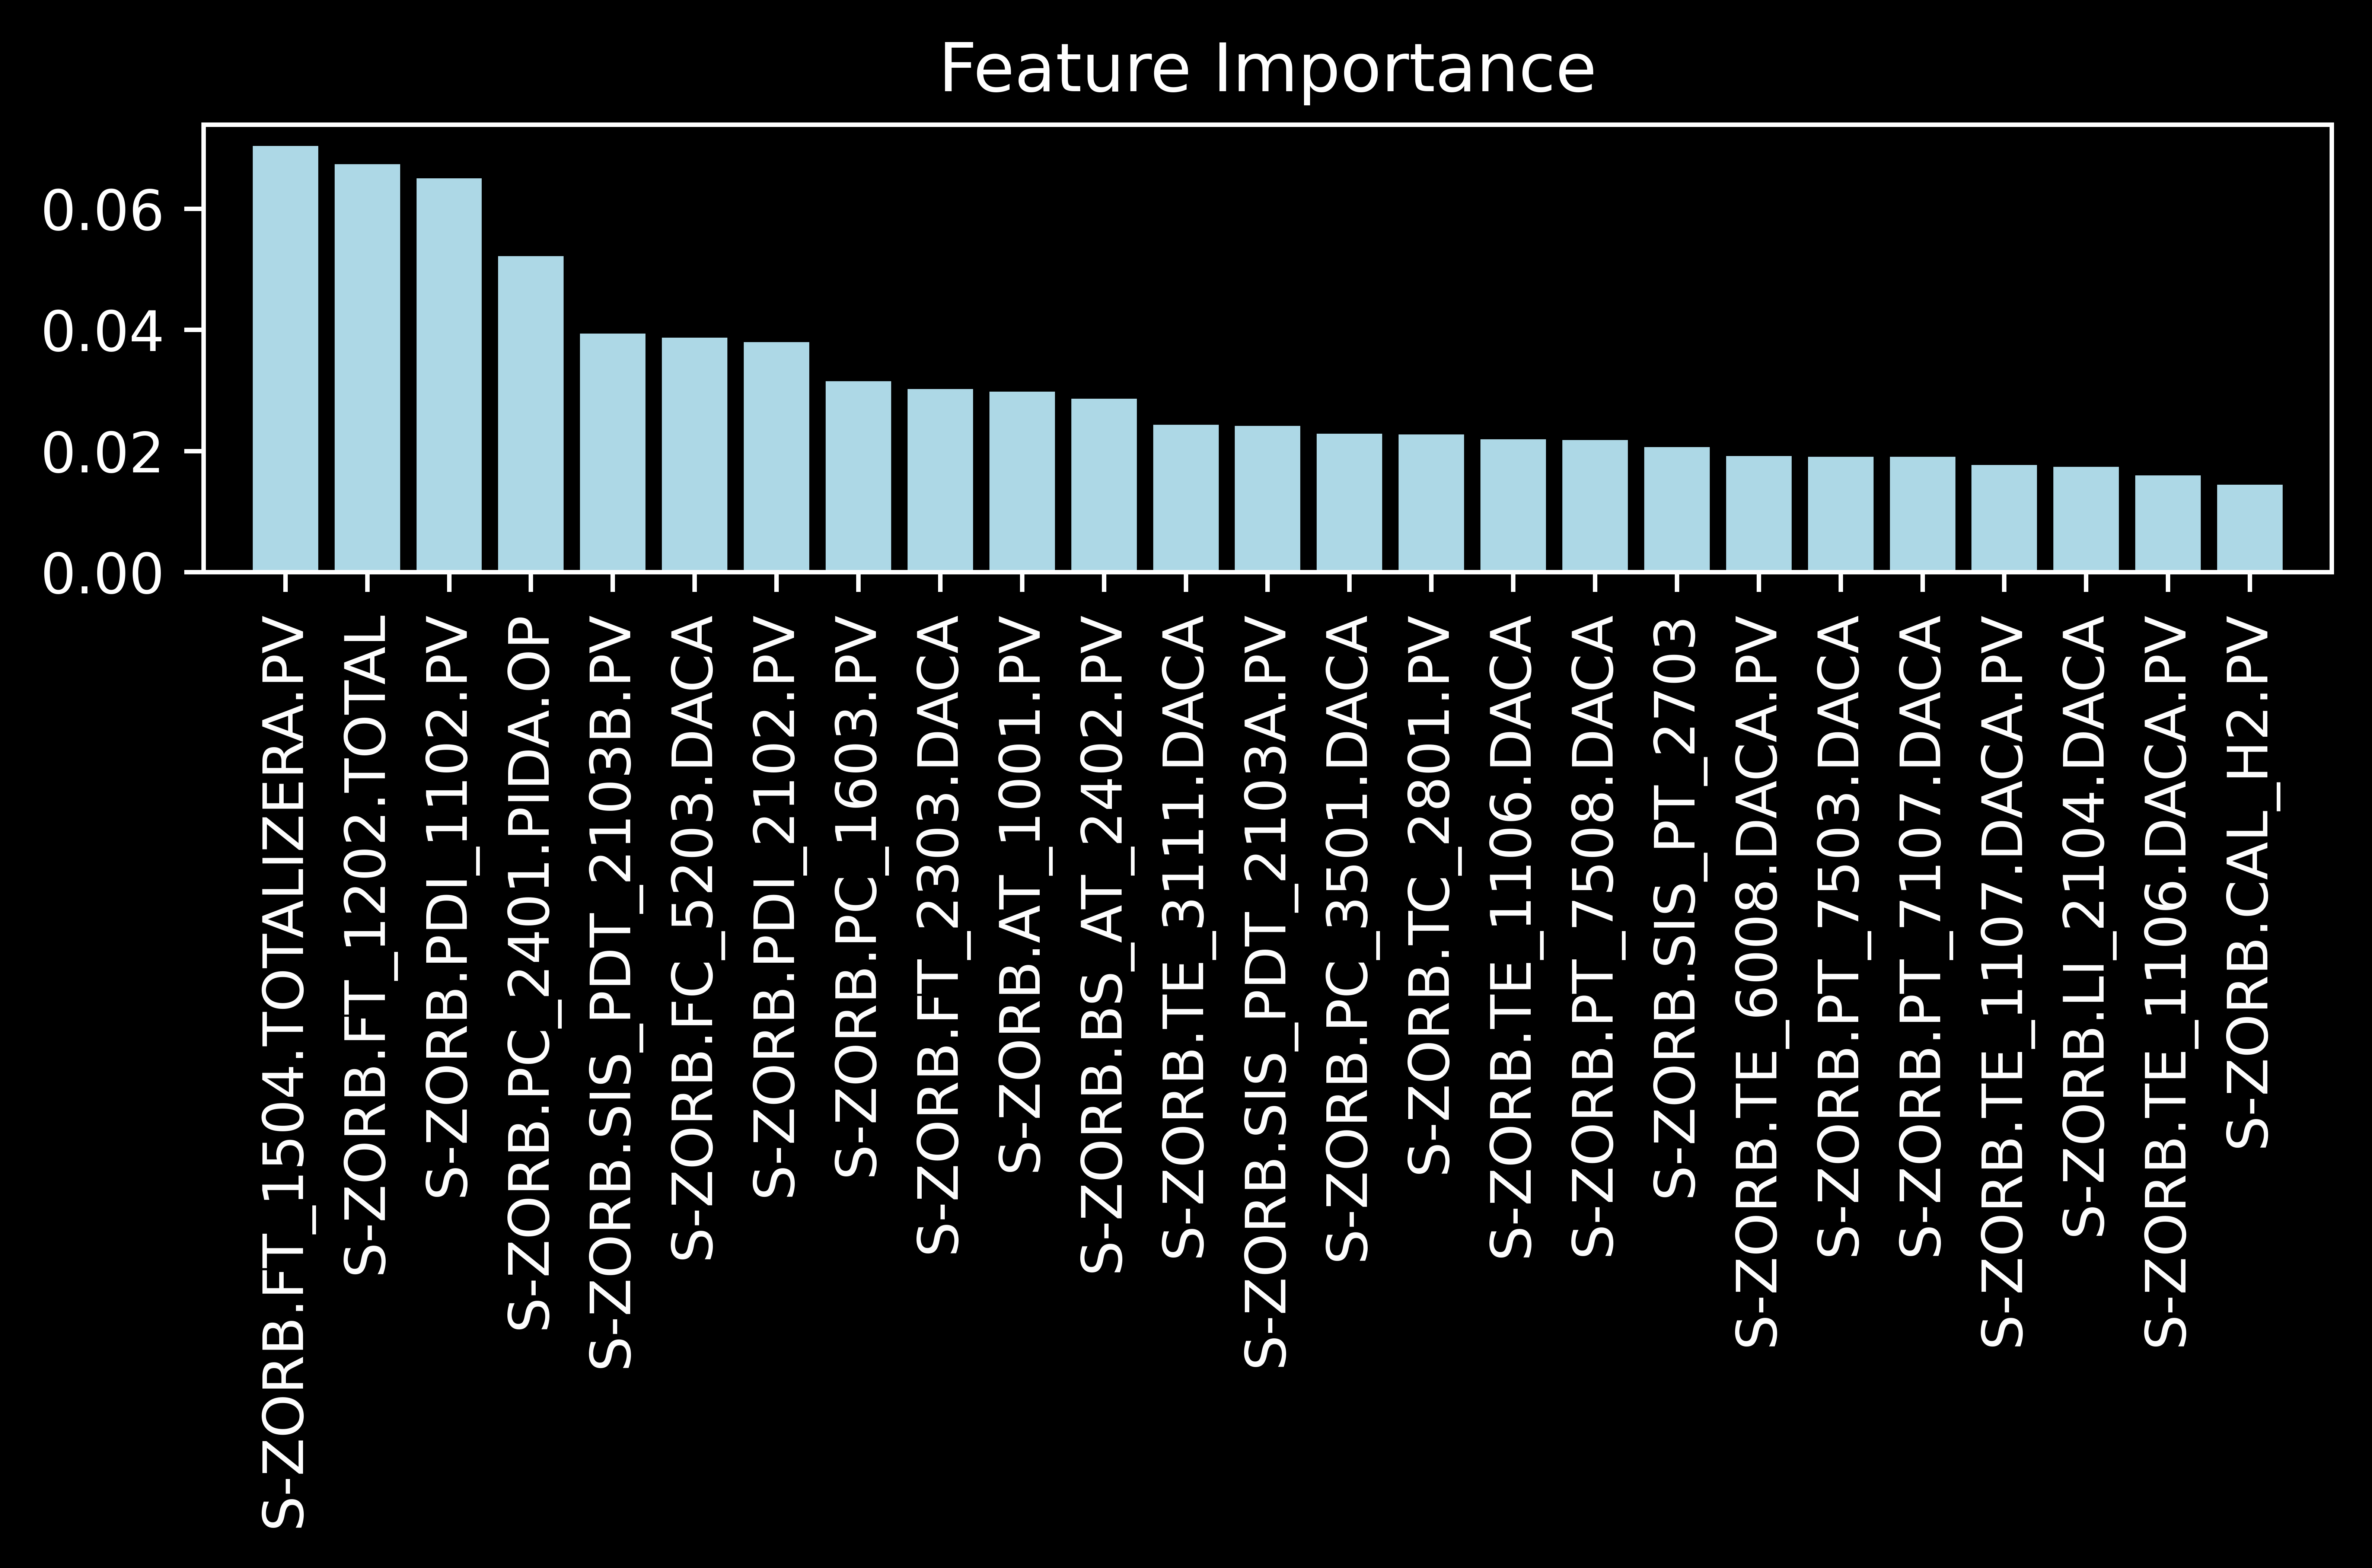

In [126]:
#np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
imp_result = np.argsort(importance)[::-1][:25]
 
#按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    print("%2d. %-*s %f" % (i + 1, 30, feat_labels[imp_result[i]], importance[imp_result[i]]))
 
#对属性列，按属性重要性从高到低进行排序
feat_labels = [feat_labels[i] for i in imp_result]
#绘制特征重要性图像
plt.subplots(dpi=1080)# 设置画布大小，分辨率，和底色
plt.title('Feature Importance')
plt.bar(range(len(imp_result)), importance[imp_result], color='lightblue', align='center')
plt.xticks(range(len(imp_result)), feat_labels, rotation=90)
plt.rc_context({'xtick.color':'black', 'ytick.color':'black'})
plt.xlim([-1, len(imp_result)])
plt.tight_layout()
plt.show()